### Computational Guided Inquiry for PChem (Neshyba)

# Numerical Moments

## Goals

An important quantitative use of probability densities is to calculate averages -- like a molecule's average speed, for example, or its average kinetic energy. Here we'll go about that in two steps: first we'll find what are called *moments*, then we'll convert those to *speed averages*.

Another goal of this exercise is to have you familiarize yourself with the shape of distribution functions, especially as the temperature changes. Along the way, you'll get accustomed to the idea of *normalization*.

## Normalization
Probability densities are supposed to have the property of being *normalized*. That means the area under the curve -- for any given temperature -- equals one. Mathematically, for the Boltzmann probability density we'd express this as

$$ 
\int\limits_{-\infty}^{\infty} f_B(v_x)dv_x = 1 \ \ \ \ (1) 
$$

and for the Maxwell probability density

$$ 
\int\limits_0^{\infty} f_M(v)dv = 1 \ \ \ \ (2) 
$$

In this CGI, we're going to evaluate these integrals numerically, using the *trapezoidal rule* (see, e.g., https://en.wikipedia.org/wiki/Trapezoidal_rule).

## Moments of speeds

*Moments* in thermodynamics are denoted using the notation $\langle ...\rangle$. Assuming the quantity you are interested in averaging depends on the *speed* (as opposed to the *velocity component*), you would use the Maxwell density function. For example, the first moment of the speed is given by

$$ 
\langle v \rangle = \int\limits_0^{\infty} vf_M(v)dv  \ \ \ \ (3) 
$$

It then follows that higher-order moments would be written

$$ 
\langle v^n \rangle = \int\limits_0^{\infty} v^nf_M(v)dv \ \ \ \ (4) 
$$

These moments can be evaluated analytically, which means a closed-form expression is available. There are integral tables for that. But you can also evaluate them numerically -- which is nice to do in this context because it can provides a check on your skill at using an integral table. Here, we'll be using a numerical method called the *trapezoidal rule* (see, e.g., https://en.wikipedia.org/wiki/Trapezoidal_rule).


## Averages of speeds
These moments have different dimensions, and therefore different units: the units of $\langle v \rangle$ in SI would be $m/s$, whereas $\langle v^2 \rangle$ would be $m^2/s^2$. That makes it difficult to compare them to one another. To get around that, we can raise the moments to  appropriate exponents (like 1, 1/2, 1/3, etc.). When we do that, we also assign special names to the results:

- The first moment of the speed raised to the power "1" is just the *average speed*. Its special name is $\bar c$,

$$
\bar c = \langle v \rangle \ \ \ \ (5)
$$ 

- The second moment of the speed raised to the power "1/2" is the *root mean square* speed. Its special name is $c$,

$$
c = \langle v^2 \rangle ^\frac{1}{2} \ \ \ \ (6)
$$ 

- The third moment of the speed raised to the power "1/3" is the *cubed-root-mean-cubed speed*. Its special name is $\tilde c$,

$$
\tilde c = \langle v^3 \rangle ^\frac{1}{3} \ \ \ \ (7)
$$


## Learning Goals
1. Explain what it means to say that a probability density is *normalized*, and how to test whether it really is.
1. Write integral formulas for moments of the speed (and velocity components).
1. Describe how the trapezoidal rule works.
1. Integrate numerically (using np.trapz).
1. Use the label/legend method for multiple graphs in a single plot.

In [1]:
# Import resources stored in the Pchem Library
%run ../PchemLibrary/ImportResources.ipynb

### Loading the probability densities
The first objective is to load in the velocity component/temperature "state space" and the Boltzmann function, and attach units using AssignQuantity (all are SI). We also report out the first and last tempertures, because we'll need that information later -- so write these temperatures in you paper notebook.

In [2]:
# Load the data
vx = np.loadtxt('vx.txt'); print(np.shape(vx))
TB = np.loadtxt('TB.txt'); print(np.shape(TB))
fB = np.loadtxt('fB.txt'); print(np.shape(fB))

# Attach units using AssignQuantity (all SI are in SI)
vx = AssignQuantity(vx,'m/s')
TB = AssignQuantity(TB,'K')
fB = AssignQuantity(fB,'s/m')

# Report the first and last temperatures
print('First temperature ',TB[0,0])
print('Last temperature ',TB[-1,0])

(50, 41)
(50, 41)
(50, 41)
First temperature  50.0 kelvin
Last temperature  500.0 kelvin


### Your turn: Maxwell probability density
Now load in the speed/temperature "state space" and the Maxwell function -- the files are named "v.txt", "TM.txt", and "fM.txt" (and call the temperature grid "TM" to distinguish it from the Boltzmann grid). Attach units appropriately (they're all SI) Finally, report out the first and last temperatures, because we'll need that information later.

In [3]:
# Load the data (v.txt, FM.txt, and fM.txt)
### BEGIN SOLUTION
v = np.loadtxt('v.txt'); print(np.shape(v))
TM = np.loadtxt('TM.txt'); print(np.shape(TM))
fM = np.loadtxt('fM.txt'); print(np.shape(fM))
### END SOLUTION

# Attach units using AssignQuantity
### BEGIN SOLUTION
v = AssignQuantity(v,'m/s')
TM = AssignQuantity(TM,'K')
fM = AssignQuantity(fM,'s/m')
### END SOLUTION

# Report the first and last temperatures
### BEGIN SOLUTION
print('First temperature ',TM[0,0])
print('Last temperature ',TM[-1,0])
### END SOLUTION

(50, 50)
(50, 50)
(50, 50)
First temperature  50.0 kelvin
Last temperature  500.0 kelvin


### Graphing $f_B$
In the cell below, we make a surface plot of $f_B(T_B,v_x)$.

<IPython.core.display.Javascript object>


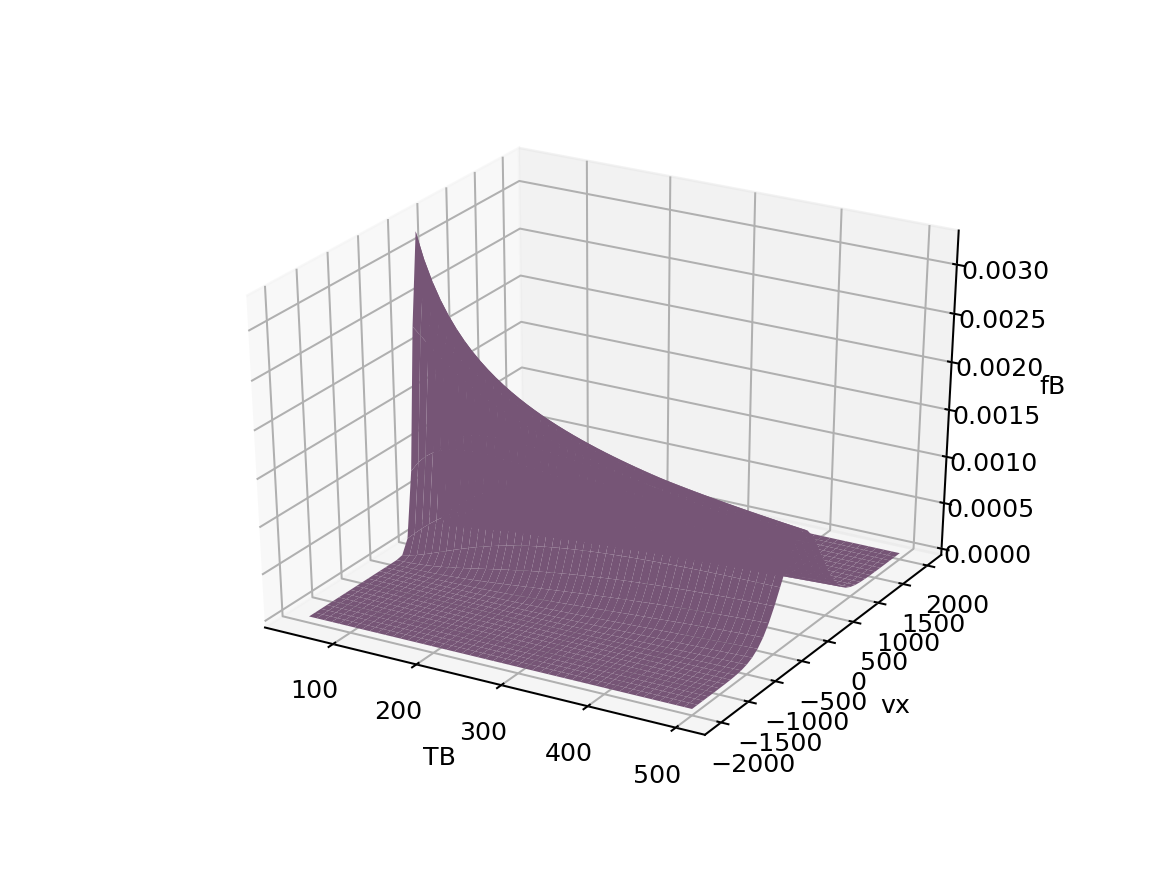

Text(0.5, 0, 'fB')

In [4]:
# Prepping the axis labels
xlabel = "TB"
ylabel = "vx"
zlabel = "fB"

# Graph the probability density
ax = PL.plot_surface(TB, vx, fB, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn: Graphing $f_M$
In the cell below, make a surface plot of $f_M(T_M,v)$.

<IPython.core.display.Javascript object>


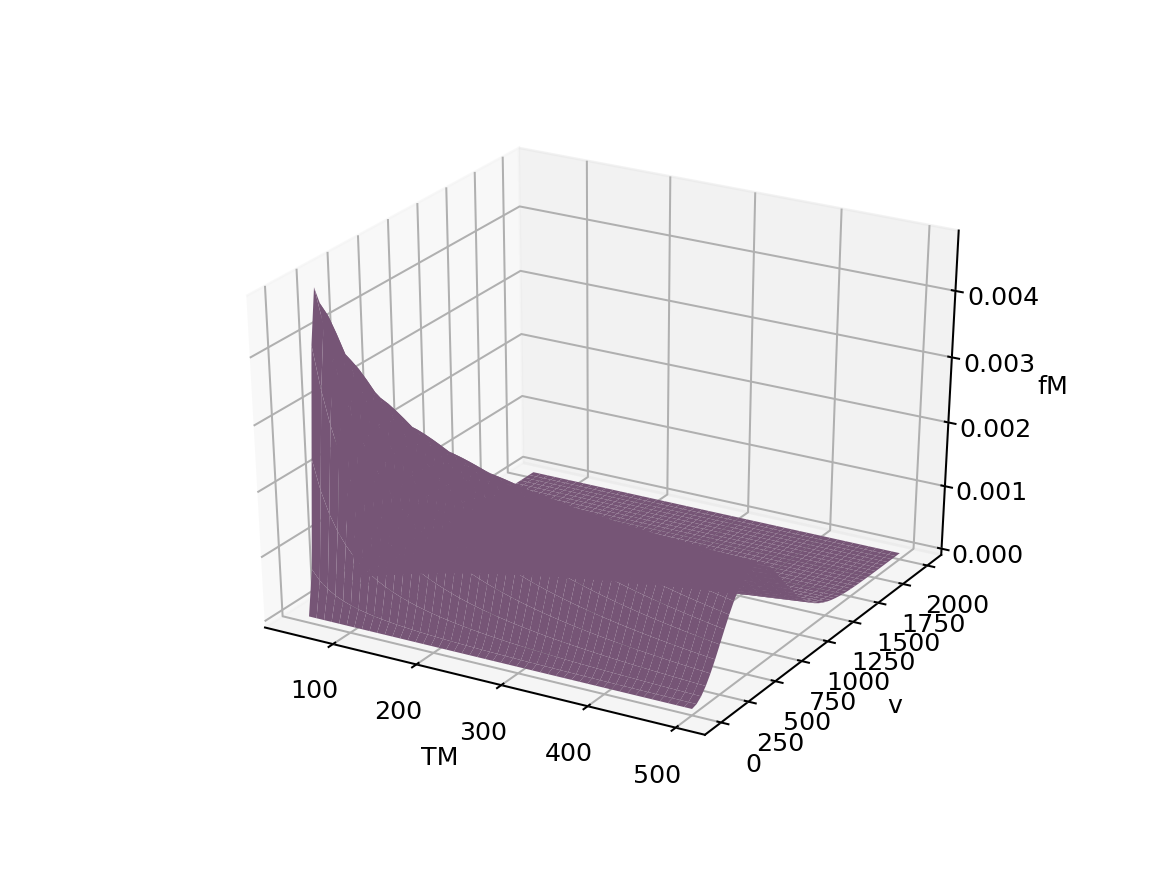

Text(0.5, 0, 'fM')

In [5]:
# Prepare the axis labels
### BEGIN SOLUTION
xlabel = "TM"
ylabel = "v"
zlabel = "fM"
### END SOLUTION

# Graph the probability density
### BEGIN SOLUTION
ax = PL.plot_surface(TM, v, fM, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Slicing, legends, and normalization
The cell below takes slices of the first and last temperature of $f_B(T_B,v_x)$ and graphs them on the same plot. The first slice is at a lower temperature, so it's colored blue; the last is colored red because it's hot.

We're also introducing a new way of identifying multiple graphs on a plot, called the *label/legend* method -- so have a look at that too.

<IPython.core.display.Javascript object>


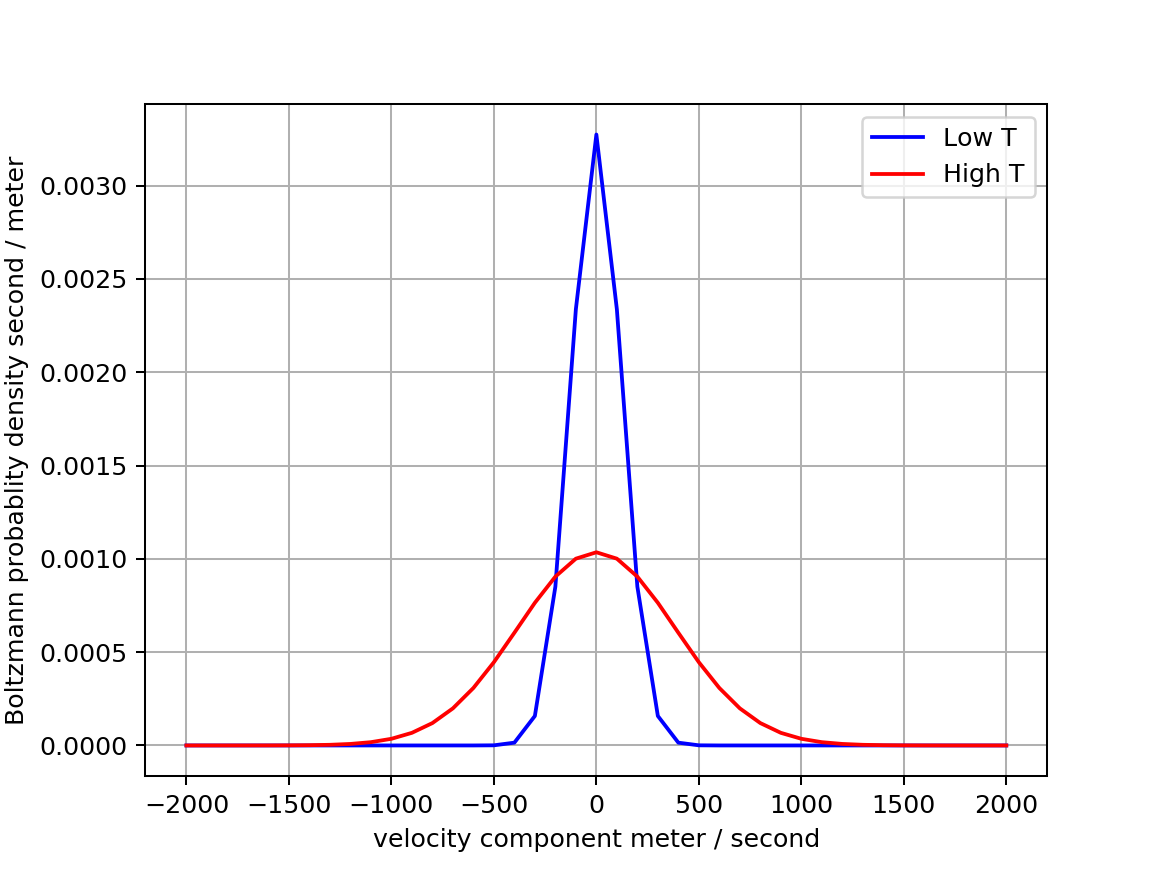

/home/instructor/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Boltzmann probablity density second / meter')

In [6]:
# Slicing out the first velocity components and probability density
vx0 = vx[0,:]
fB0 = fB[0,:]

# Slicing out the last velocity components and probability density
vxlast = vx[-1,:]
fBlast = fB[-1,:]

# Specifying labels 
xlabel = 'velocity component ' + str(vx0.units)
ylabel = 'Boltzmann probablity density ' + str(fBlast.units)

# Plotting using the label/legend method
plt.figure()
plt.plot(vx0,fB0,'blue',label='Low T')
plt.plot(vxlast,fBlast,'red',label='High T')
plt.legend()
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### Your turn
Now slice and plot the Maxwell function, $f_M(v)$, at the first and last temperatures. Use the "label/legend" method!

<IPython.core.display.Javascript object>


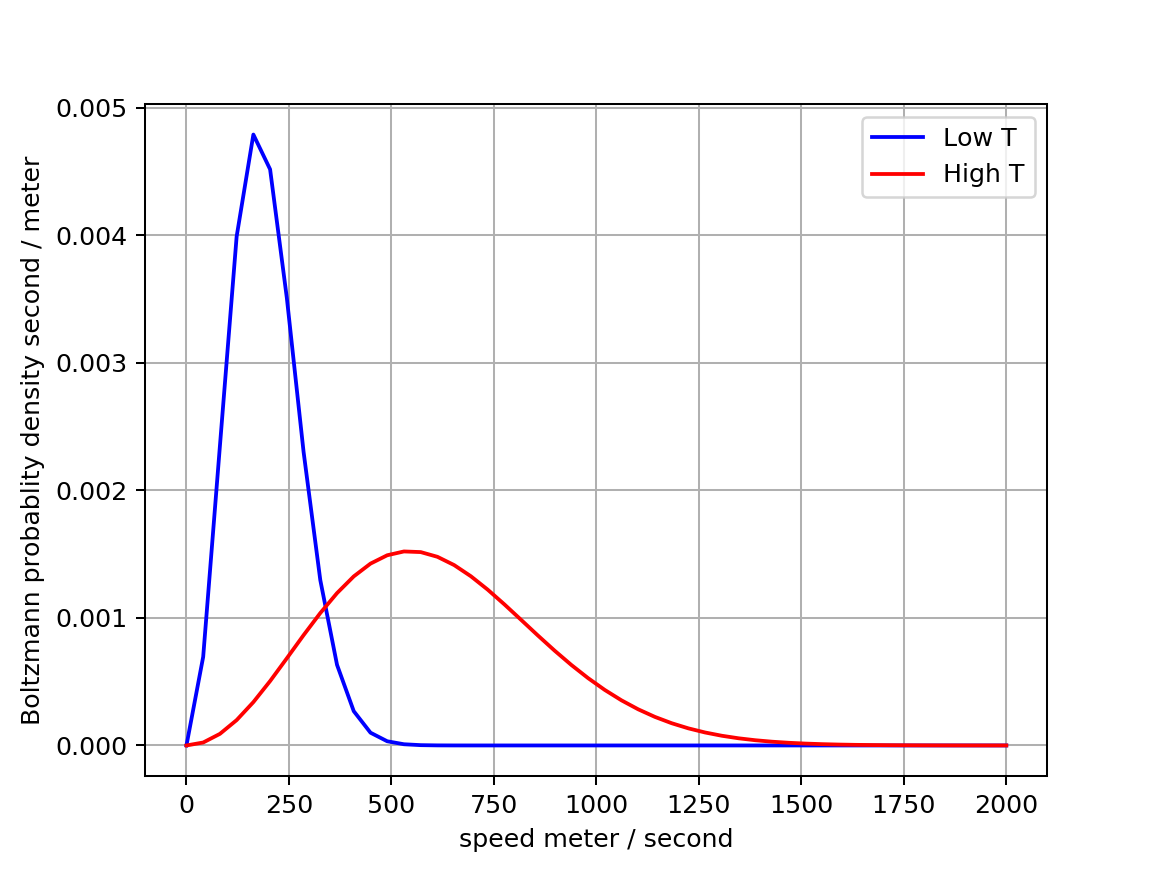

In [7]:
# Slicing out the first speeds and probability density
### BEGIN SOLUTION
v0 = v[0,:]
fM0 = fM[0,:]
### END SOLUTION

# Slicing out the last speeds and probability density
### BEGIN SOLUTION
vlast = v[-1,:]
fMlast = fM[-1,:]
### END SOLUTION

# Specifying labels 
### BEGIN SOLUTION
xlabel = 'speed ' + str(v0.units)
ylabel = 'Boltzmann probablity density ' + str(fM0.units)
### END SOLUTION

# Plotting using the label/legend method
### BEGIN SOLUTION
plt.figure()
plt.plot(v0,fM0,'blue',label='Low T')
plt.plot(vlast,fMlast,'red',label='High T')
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
### END SOLUTION

### Testing for normalization of the Boltzmann probability using numerical integration
Below we look at whether our Boltzmann functions are *normalized*, using numpy's *trapz* function (which implements the trapezoidal rule).  Because this is a numerical integration, we don't expect the area to be exactly one -- but we'll be happy if it's pretty close.

We're also introducing here a way to print numbers in scientific notation, which can be handy.

In [8]:
# Testing for normalization of the first (lowest) temperature
Area_under_fB0 = np.trapz(fB0,vx0)
print(Area_under_fB0)
print("{:.3e}".format(Area_under_fB0))

# Testing for normalization of the last (highest) temperature
Area_under_fBlast = np.trapz(fBlast,vxlast)
print(Area_under_fBlast)
print("{:.3e}".format(Area_under_fBlast))

1.0000000000003748 dimensionless
1.000e+00 dimensionless
0.999999758456932 dimensionless
1.000e+00 dimensionless


### Your turn: Normalization of the Maxwell probability density using numerical integraion
In the cell below, test for normalization of the Maxwell functions at the first and last temperatures you sliced out before.

In [9]:
# Testing for normalization of the first (lowest) temperature
### BEGIN SOLUTION
Area_under_fM0 = np.trapz(fM0,v0)
print("{:.3e}".format(Area_under_fM0))
### END SOLUTION

# Testing for normalization of the last (highest) temperature
### BEGIN SOLUTION
Area_under_fMlast = np.trapz(fMlast,vlast)
print("{:.3e}".format(Area_under_fMlast))
### END SOLUTION

1.000e+00 dimensionless
1.000e+00 dimensionless


### Moments 
Now we'll take a look at the *first moment* of the Maxwell density function. As you'll be able to see from the cell below, we can do this numerically using the same trapezoidal rule(!). If you consult Eqs. (2) and (3), the only difference between testing for normalization and evaluating the first moment of the speed is that the integrand, instead of being $f_M$, is $v f_M$.

You'll also see in the cell below, that we're graphing this integrand ($v f_M$) for the first (lowest) temperature and the last (hottest) available in the data. The purpose of that is to examine whether the integration "goes out" far enough that we're not missing anything.

After you run the cell below, write down the value of of the 1st moment (low-T and high-T) in your paper notebook.

<IPython.core.display.Javascript object>


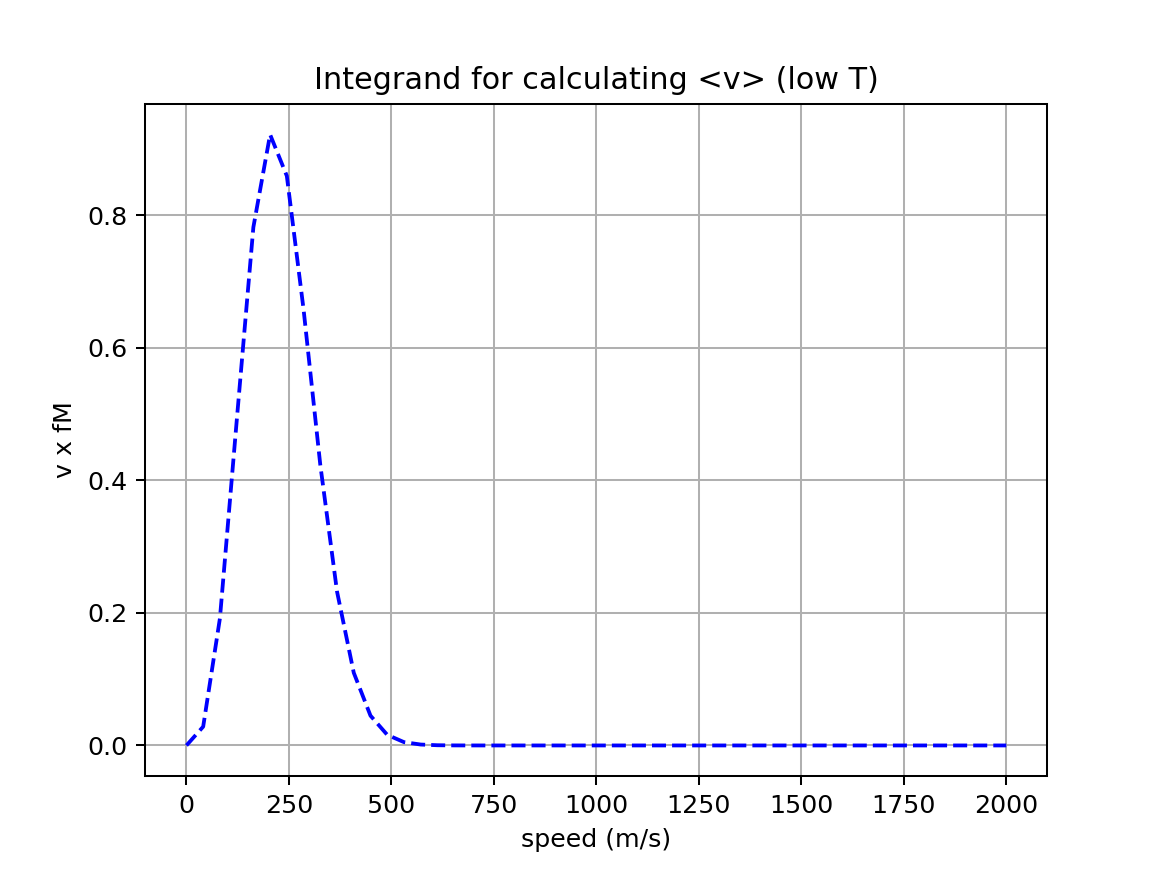

1st moment, low T =
1.944e+02 meter / second


<IPython.core.display.Javascript object>


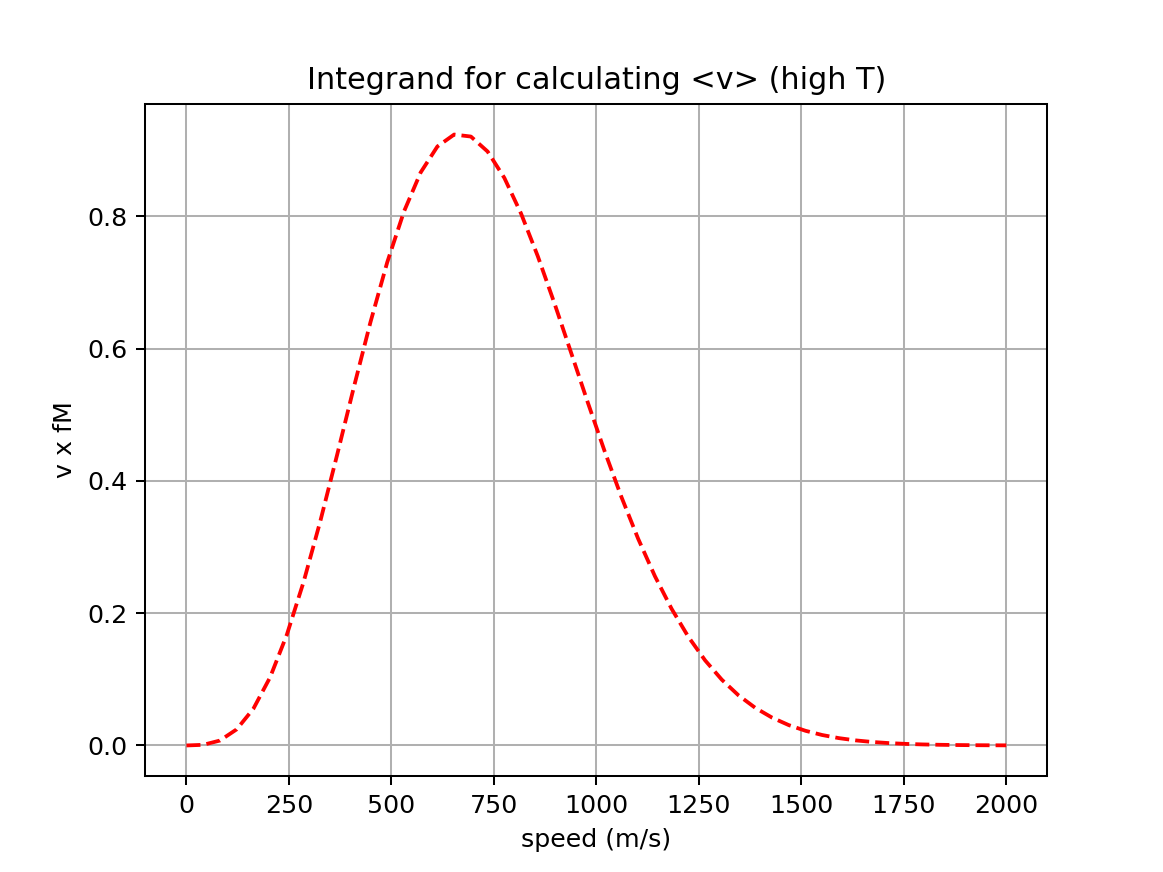

1st moment, high T =
6.149e+02 meter / second


In [10]:
# These will be good for both graphs
xlabel = 'speed (m/s)'
ylabel = 'v x fM'
title = 'Integrand for calculating <v>'

# Computing the first moment of the low-temperature speed
integrand = v0*fM0
moment1 = np.trapz(integrand,v0)

# Plotting
plt.figure()
plt.plot(v0,integrand,'b--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title(title+' (low T)')
print('1st moment, low T =')
print("{:.3e}".format(moment1))

# Computing the first moment of the high-temperature speed
integrand = vlast*fMlast
moment1 = np.trapz(integrand,vlast)

# Plotting
plt.figure()
plt.plot(v0,integrand,'r--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title(title+' (high T)')
print('1st moment, high T =')
print("{:.3e}".format(moment1))

### Your turn
Now find the *second* moments of the first and last temperature. You'll probably want to use code along the lines of

    integrand = v0**2*fM0
    moment2 = np.trapz(integrand,v0)

Write their values down too.

<IPython.core.display.Javascript object>


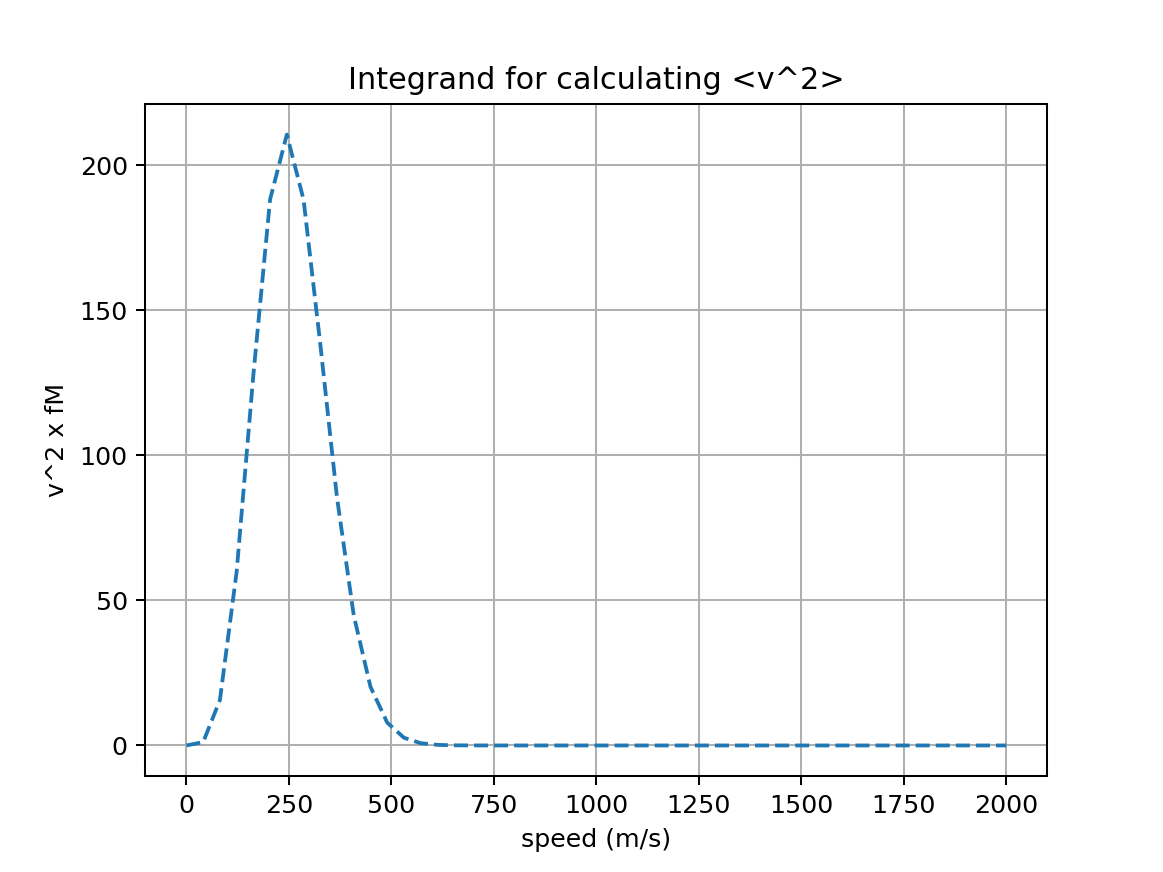

2nd moment, low T =
4.454e+04 meter ** 2 / second ** 2


<IPython.core.display.Javascript object>


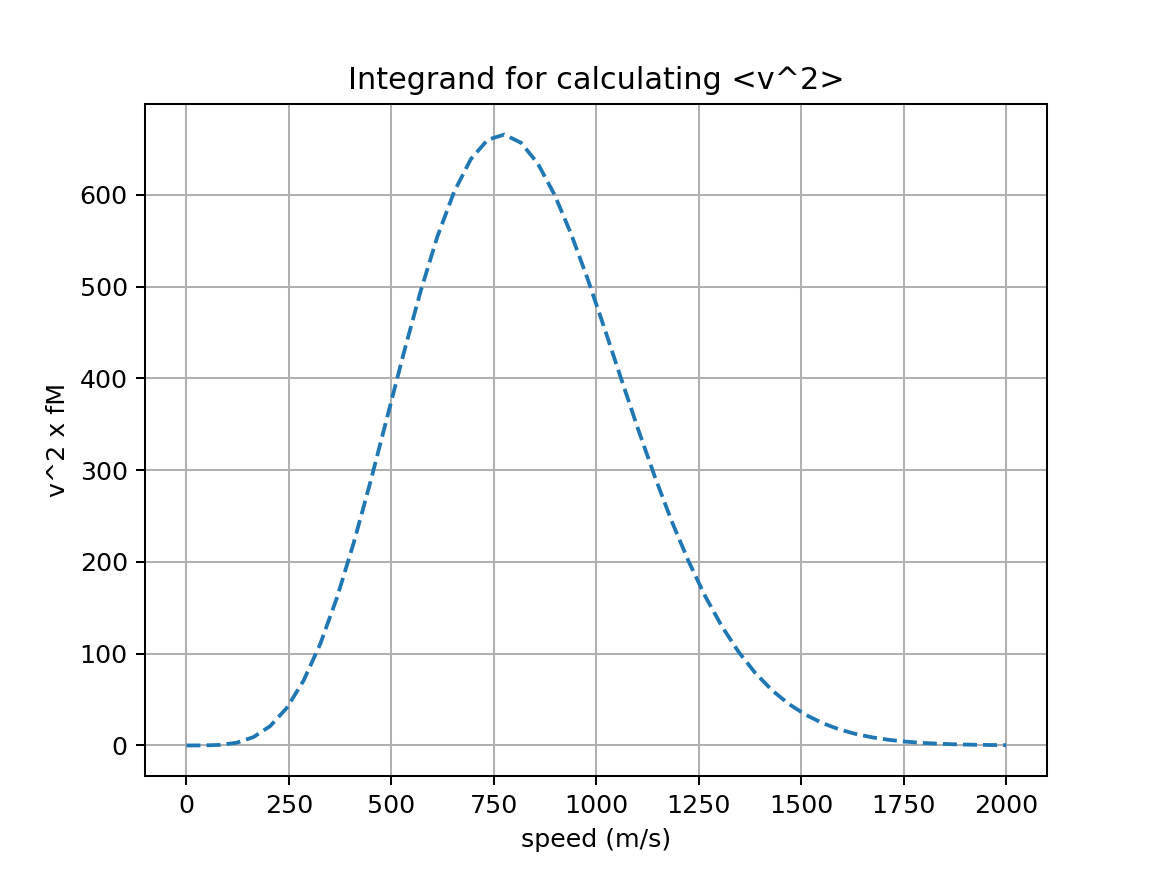

2nd moment, high T =
4.454e+05 meter ** 2 / second ** 2


In [11]:
# These will be good for both graphs
xlabel = 'speed (m/s)'
ylabel = 'v^2 x fM'
title = 'Integrand for calculating <v^2>'


# Calculate/plot the integrand, and compute the second moment, of the low-temperature speed
### BEGIN SOLUTION
integrand = v0**2*fM0
plt.figure()
plt.plot(v0,integrand,'--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title(title)
moment2 = np.trapz(integrand,v0)
print('2nd moment, low T =')
print("{:.3e}".format(moment2))
### END SOLUTION

# Same for the last temperature
### BEGIN SOLUTION
integrand = vlast**2*fMlast
plt.figure()
plt.plot(v0,integrand,'--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title(title)
moment2 = np.trapz(integrand,v0)
print('2nd moment, high T =')
print("{:.3e}".format(moment2))
### END SOLUTION

### Your turn: third moments
Now find the *third* moments of the first and last temperatures, and write their values down too.

<IPython.core.display.Javascript object>


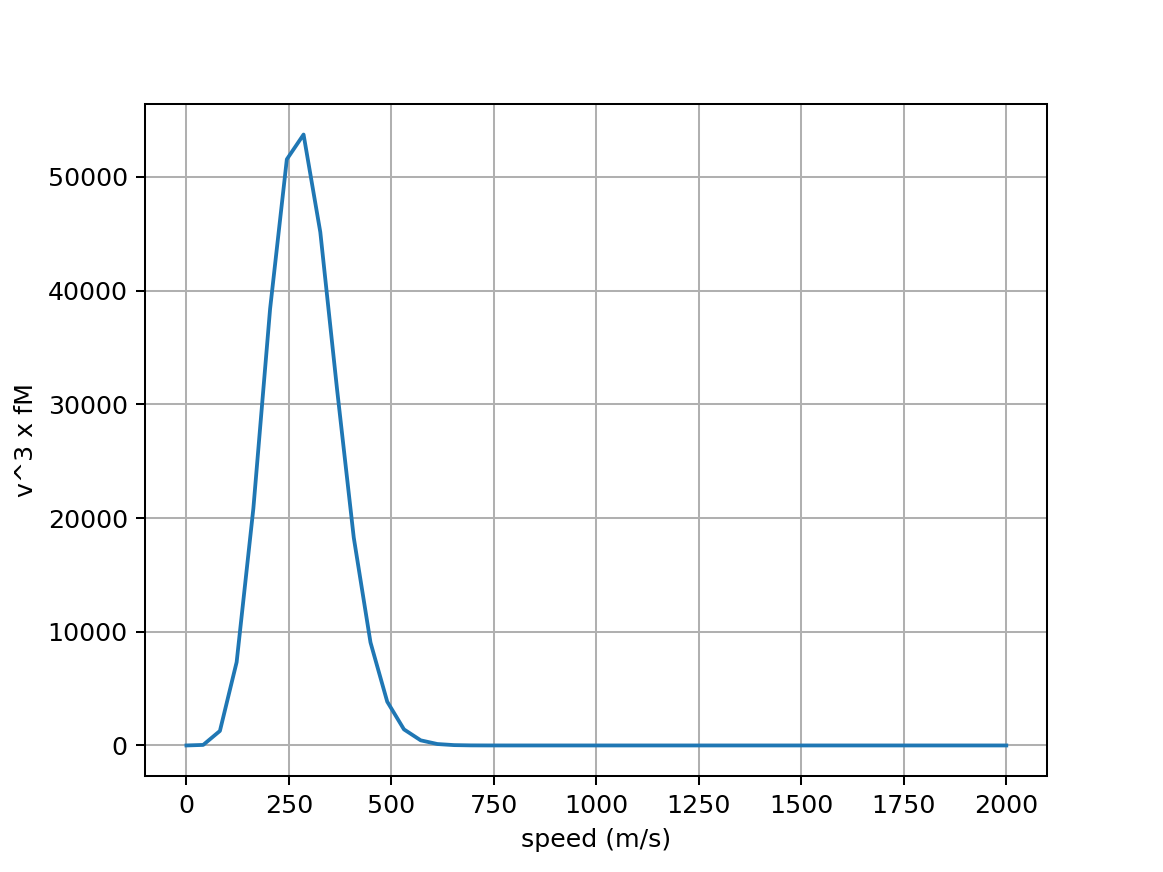

3rd moment, low T =
1.155e+07 meter ** 3 / second ** 3


<IPython.core.display.Javascript object>


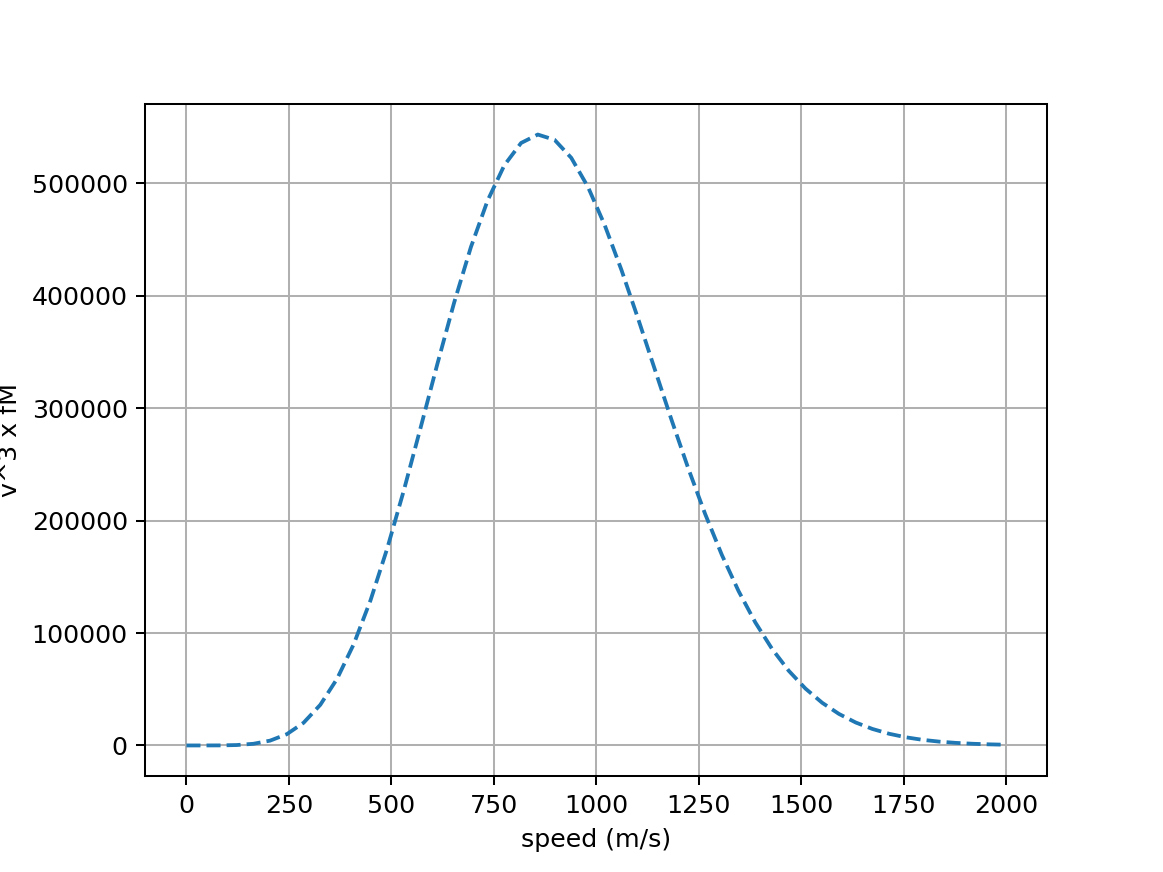

3rd moment, high T =
3.651e+08 meter ** 3 / second ** 3


In [12]:
# These will be good for both graphs
xlabel = 'speed (m/s)'
ylabel = 'v^3 x fM'
title = 'Integrand for calculating <v^3>'

# Computing the third moment of the low-temperature speed
### BEGIN SOLUTION
integrand = v0**3*fM0
plt.figure()
plt.plot(v0,integrand)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
moment3 = np.trapz(integrand,v0)
print('3rd moment, low T =')
print("{:.3e}".format(moment3))
### END SOLUTION

# Computing the first moment of the high-temperature speed
### BEGIN SOLUTION
integrand = vlast**3*fMlast
plt.figure()
plt.plot(v0,integrand,'--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
moment3 = np.trapz(integrand,v0)
print('3rd moment, high T =')
print("{:.3e}".format(moment3))
### END SOLUTION

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page